In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('yc_essential_data.csv')

In [22]:
data

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,batch,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,W06,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,W06,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,W06,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,W06,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,W06,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,22673,Gigs Live,gigs-live,"[""TXL Technology Inc""]",https://bookface-images.s3.amazonaws.com/small...,https://gigs.live,"New York, NY, USA","We are the Substack for millions of artists, m...",Video publishing and monetization platform for...,3.0,...,W21,Inactive,"[""Consumer""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,22673
4413,22664,SBX Robotics,sbx-robotics,[],https://bookface-images.s3.amazonaws.com/small...,https://www.sbxrobotics.com/,"Toronto, ON, Canada",SBX Robotics generates synthetic data that tea...,Synthetic data for better vision.,5.0,...,W21,Inactive,"[""B2B"", ""Engineering, Product and Design""]","[""Canada"", ""America / Canada"", ""Remote"", ""Part...",Early,False,False,NaN,False,22664
4414,22652,Playmaker,playmaker,[],https://bookface-images.s3.amazonaws.com/small...,http://getplaymaker.app,"Copenhagen, Denmark","We're building the social, infrastructure laye...",Community for fantasy sports players,5.0,...,W21,Inactive,"[""Consumer"", ""Content""]","[""Denmark"", ""Europe"", ""Remote"", ""Partly Remote""]",Early,False,False,NaN,False,22652
4415,22600,Neverland,neverland,[],https://bookface-images.s3.amazonaws.com/small...,http://www.enterneverland.com/,"San Francisco, CA, USA; Remote",Neverland is the first marketplace that connec...,The first online home garden and lawn marketpl...,2.0,...,W21,Inactive,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada...",Early,False,False,NaN,False,22600


In [23]:
data = data[data.batch != 'Unspecified']

In [24]:
def get_season(batch: str):
    season = batch[0]
    year = "20" + batch[1:]
    return season

def get_year(batch: str):
    if batch.startswith("IK"):
        year = "20" + batch[2:]
    else:
        year = "20" + batch[1:]
    return year

In [25]:
data['year'] = data['batch'].apply(get_year)

/var/folders/bz/1tlnq74x49v0f7m4cm3dzs6r0000gp/T/ipykernel_3188/3055377317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['batch'].apply(get_year)


In [45]:
data = data.set_index('id')

In [26]:
data.head()

,id,name,slug,former_names,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,...,status,industries,regions,stage,app_video_public,demo_day_video_public,app_answers,question_answers,objectID,year
0,370,Wufoo,wufoo,[],https://bookface-images.s3.amazonaws.com/small...,http://wufoo.com,"Tampa, FL, USA",Wufoo is a web application that helps anybody ...,Online form builder.,11.0,...,Acquired,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,370,2006
1,369,Project Wedding,project-wedding,[],/company/thumb/missing.png,http://projectwedding.com,"Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",NaN,2.0,...,Acquired,"[""Consumer"", ""Home and Personal""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,369,2006
2,367,Clustrix,clustrix,[],https://bookface-images.s3.amazonaws.com/small...,http://clustrix.com,"San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,NaN,51.0,...,Acquired,"[""B2B"", ""Infrastructure""]","[""United States of America"", ""America / Canada""]",Growth,False,False,NaN,False,367,2006
3,366,Inkling,inkling,[],/company/thumb/missing.png,http://inklingmarkets.com,"Chicago, IL, USA","Inkling, based in Chicago, Illinois, offers co...",NaN,11.0,...,Acquired,"[""B2B"", ""Finance and Accounting""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,366,2006
4,372,Audiobeta,audiobeta,[],/company/thumb/missing.png,http://audiobeta.com,"Somerville, MA, USA",AudioBeta develops web-based applications that...,NaN,0.0,...,Inactive,"[""B2B"", ""Marketing""]","[""United States of America"", ""America / Canada""]",Early,False,False,NaN,False,372,2006


In [27]:
import re
def clear_from_url(text):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

In [28]:
df = data[['long_description', 'year', 'id']]
df = df.dropna()
df = df.set_index('id')
df.index.name = None
df['descr'] = df['long_description'].apply(clear_from_url)
df['len_descr'] = df.descr.apply(len)
df = df[df['len_descr'] > 50]
df['how_different_from_500'] = np.abs(df['len_descr'] - 500)
df = df.drop('long_description', axis=1)
df = df.sort_values(by=['year'])

In [29]:
df.head(10)

,long_description,year,descr,len_descr,how_different_from_500
380,What is Infogami?\n\nThe art of transforming d...,2005,What is Infogami?\n\nThe art of transforming d...,659,159
379,Founded by Steve Huffman and Alexis Ohanian in...,2005,Founded by Steve Huffman and Alexis Ohanian in...,457,43
378,Kiko is a web calendar for anyone who wants to...,2005,Kiko is a web calendar for anyone who wants to...,493,7
375,ClickFacts is a Malware Software Solutions com...,2005,ClickFacts is a Malware Software Solutions com...,787,287
374,"Founded in 2005, TextPayMe is an SMS payment s...",2005,"Founded in 2005, TextPayMe is an SMS payment s...",1110,610
373,"Loopt, based in Silicon-Valley and backed by l...",2005,"Loopt, based in Silicon-Valley and backed by l...",474,26
356,Read and listen without limits. Unlimited* aud...,2006,Read and listen without limits. Unlimited* aud...,683,183
357,OMGPOP is a leading developer of social games ...,2006,OMGPOP is a leading developer of social games ...,327,173
355,Xobni makes your inbox and address book smarte...,2006,Xobni makes your inbox and address book smarte...,454,46
365,"A platform bridging mobile text messages, emai...",2006,"A platform bridging mobile text messages, emai...",347,153


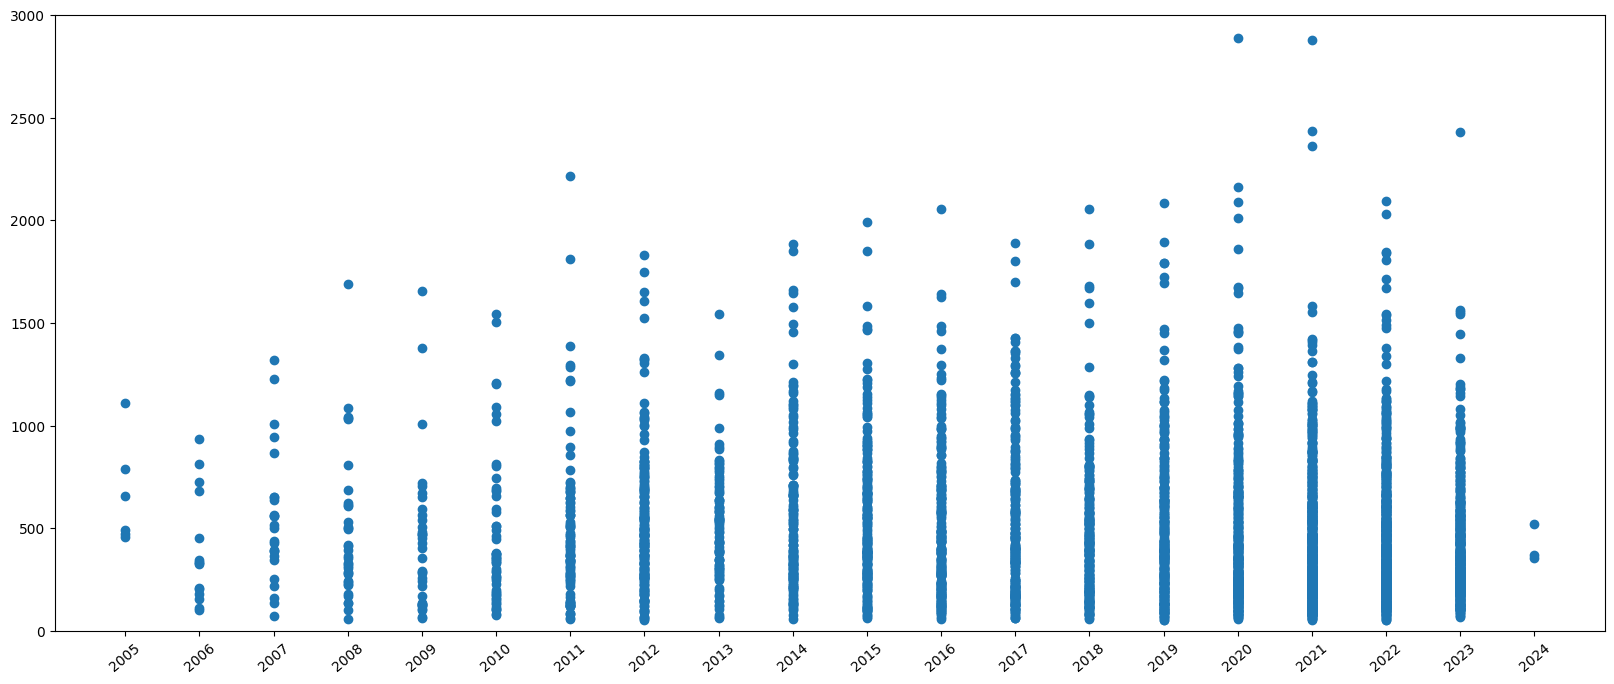

In [32]:
plt.figure(figsize=(20,8))
plt.scatter(df['year'], df['len_descr'])
plt.ylim(0, 3000)
plt.xticks(rotation=40);

In [17]:
mean_len_df = df.groupby("year").mean(numeric_only=True)
mean_len_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Diff with 500')

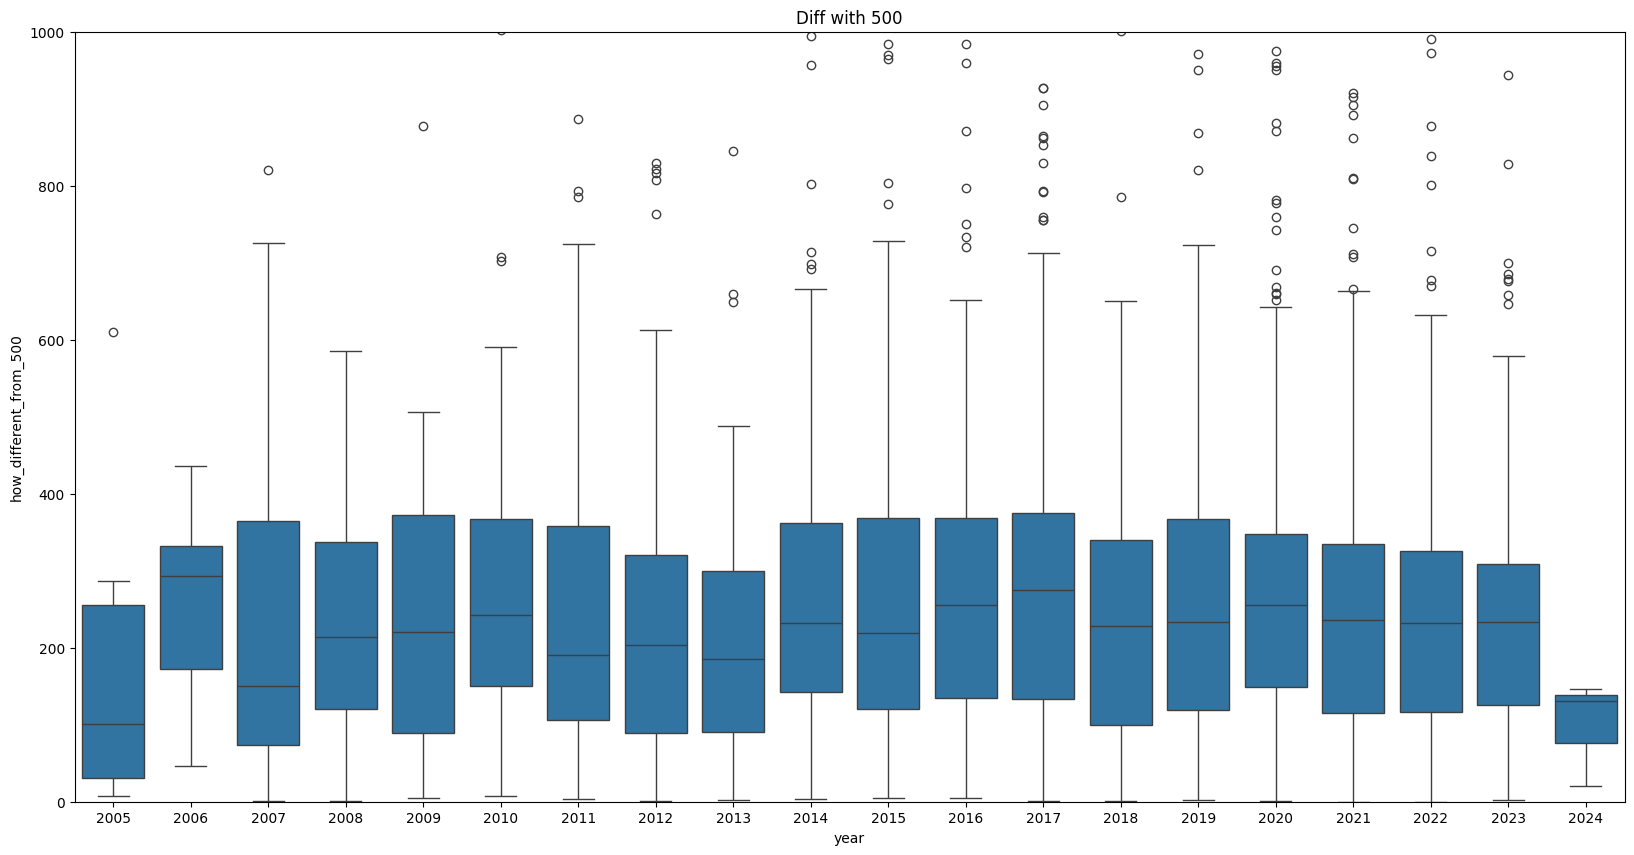

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="how_different_from_500", fill=True)
plt.ylim(0, 1000)
plt.title("Diff with 500")

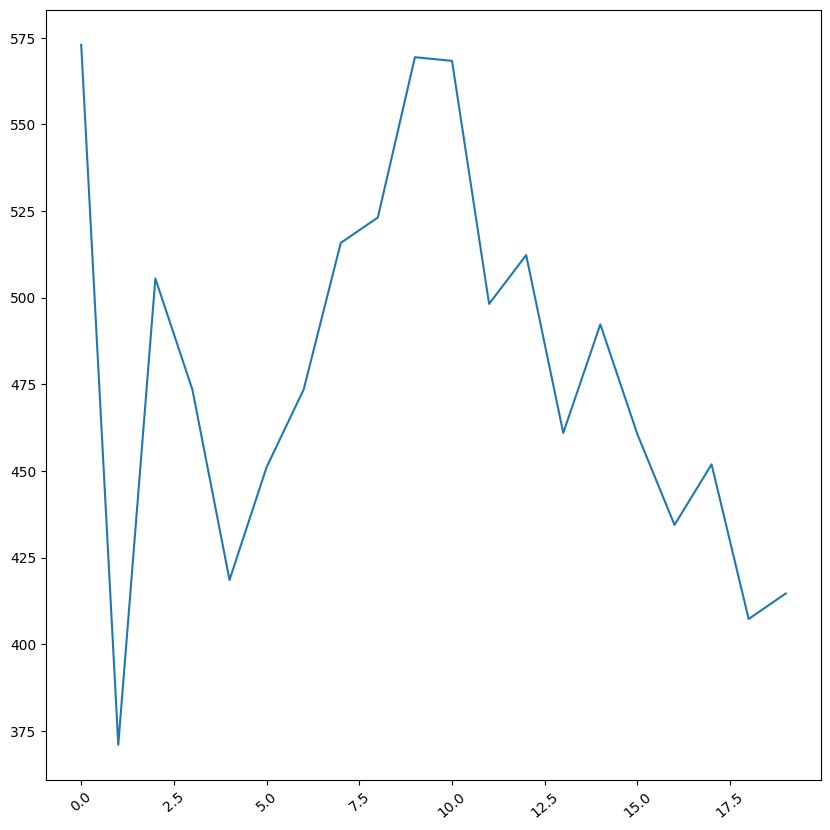

In [21]:
plt.figure(figsize=(10,10))
plt.plot(mean_len_df.index, mean_len_df['len_descr'])
plt.xticks(rotation=40);

(0.0, 2000.0)

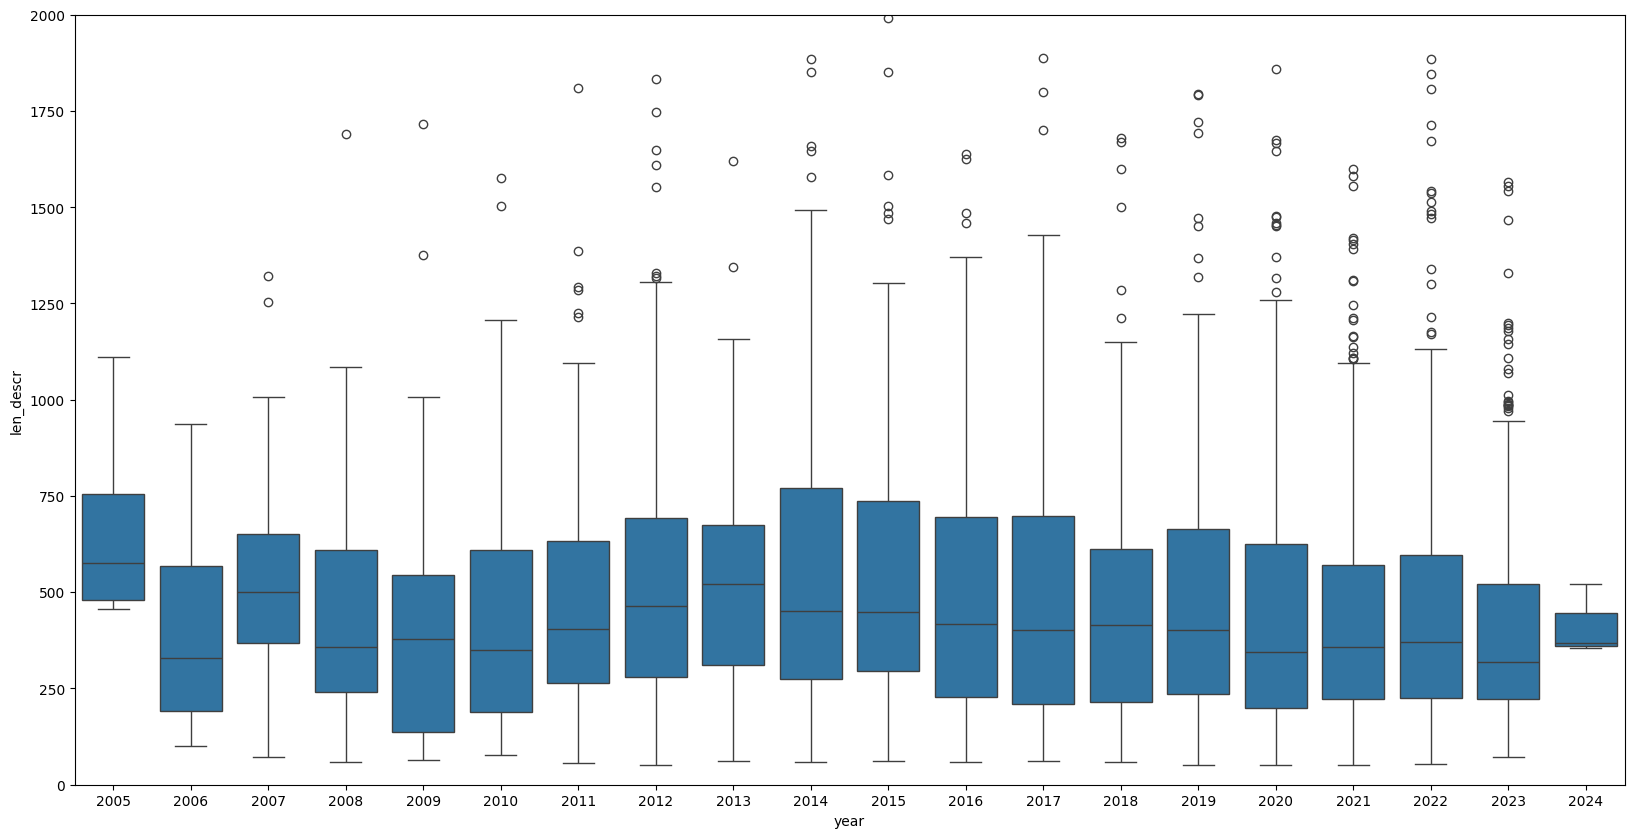

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="year", y="len_descr", fill=True)
plt.ylim(0, 2000)

Какого-т роста длины описаний с годами не наблюдается, зато видим больше "выбросов" с длинными описаниями

## Clustering

In [33]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [34]:
features = np.array(df['len_descr']).reshape(-1, 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [35]:
scaled_features

array([[ 0.54174324],
       [-0.04325196],
       [ 0.06100461],
       ...,
       [-0.34154159],
       [-0.29810136],
       [ 0.14209305]])

In [36]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10,  max_iter=300, random_state=42)

In [37]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [38]:
df['cluster'] = kmeans.labels_

In [39]:
cluster_divide = df[df['cluster'] == 0].sort_values(by=['len_descr']).tail(1)['len_descr'].values[0]
print(cluster_divide)

633


(0.0, 2500.0)

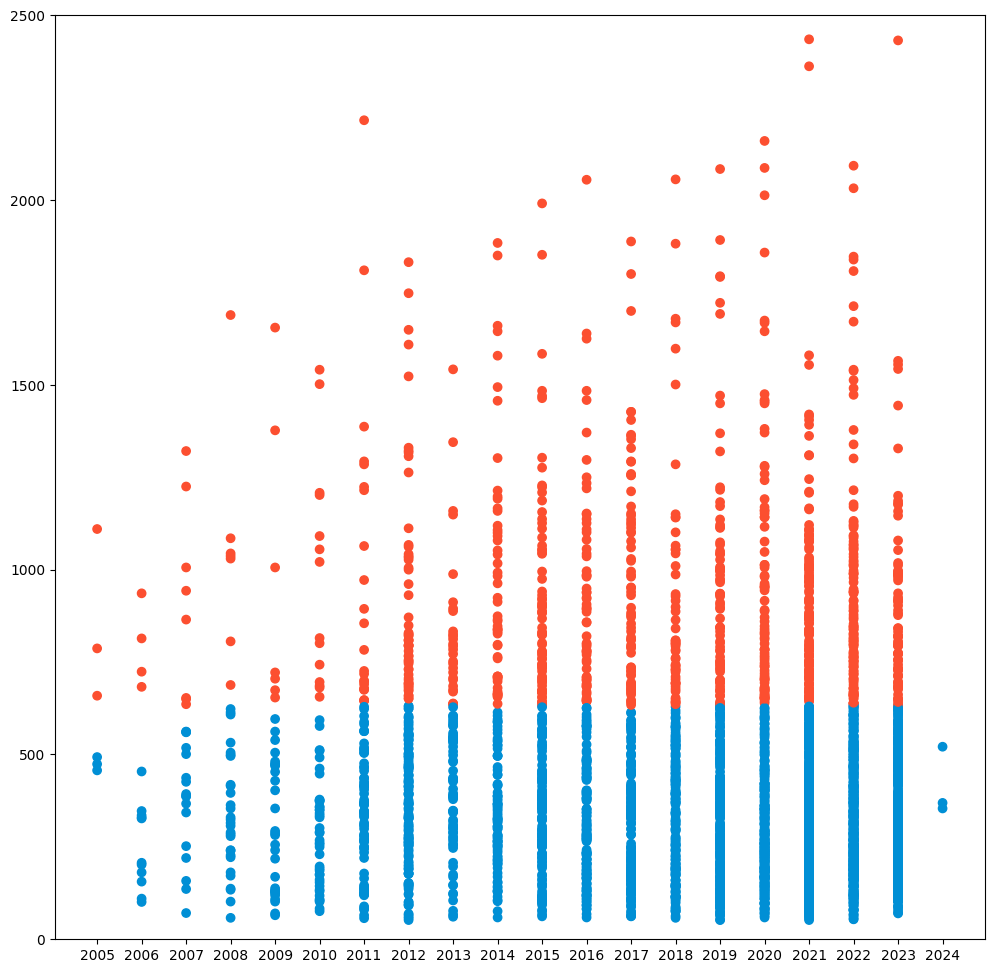

In [40]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
plt.scatter(df['year'], df['len_descr'], c=km_colors)
plt.ylim(0, 2500)

In [41]:
short_descr = df[df['cluster'] == 0]
long_descr = df[df['cluster'] == 1]

Text(0.5, 1.0, 'Distribution of short and long descriptions')

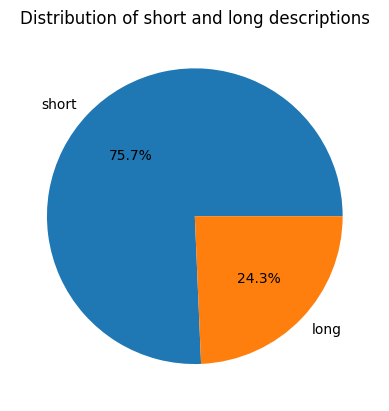

In [178]:
sizes = [len(short_descr) / len(df), len(long_descr) / len(df)]
labels = ['short', 'long']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of short and long descriptions')

In [100]:
short_descr_median = short_descr['len_descr'].median(numeric_only=True)
long_descr_median = long_descr['len_descr'].median(numeric_only=True)

In [101]:
print("Median for short descriptions = ", short_descr_median)
print("Median for long descriptions = ", long_descr_median)

Median for short descriptions =  299.0
Median for long descriptions =  841.0


In [73]:
short_descr_mean = short_descr['len_descr'].mean(numeric_only=True)
long_descr_mean = long_descr['len_descr'].mean(numeric_only=True)

In [74]:
print("Mean for short descriptions = ", short_descr_mean)
print("Mean for long descriptions = ", long_descr_mean)

Mean for short descriptions =  318.3046900623155
Mean for long descriptions =  949.4260958205913


(0.0, 2000.0)

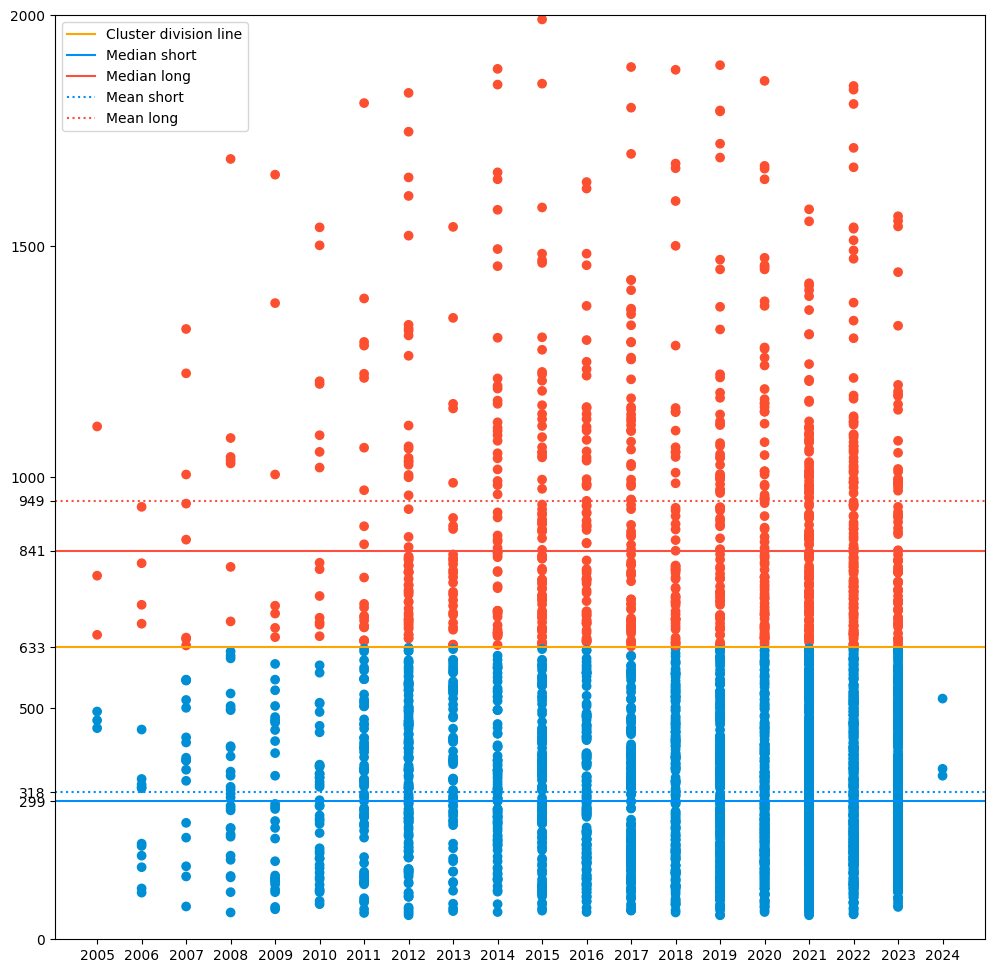

In [78]:
plt.figure(figsize=(12,12))
fte_colors = {
     0: "#008fd5",
     1: "#fc4f30",
     }
median_colors = {
     0: "#008ff8",
     1: "#fc4f40",
     }
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1 = plt.axes()
ax1.scatter(df['year'], df['len_descr'], c=km_colors)
ax1.axhline(cluster_divide, color='orange', label = 'Cluster division line')
ax1.axhline(short_descr_median, color=median_colors[0], label = 'Median short')
ax1.axhline(long_descr_median, color=median_colors[1], label='Median long')
ax1.axhline(short_descr_mean, color=median_colors[0], label = 'Mean short', linestyle=':')
ax1.axhline(long_descr_mean, color=median_colors[1], label='Mean long', linestyle=':')
ax1.set_yticks([0, short_descr_median, short_descr_mean, 500, cluster_divide, long_descr_median, long_descr_mean, 1000, 1500, 2000])
plt.legend(loc='best')
plt.ylim(0, 2000)

## Analysing Separately : Countries

In [108]:
data = data.set_index('id')
data.index.name = None

In [251]:
short_add_info = data.loc[short_descr.index.values][['regions', 'all_locations', 'industries', 'long_description']]


In [252]:
short_add_info['len_descr'] = short_add_info['long_description'].apply(len)
short_add_info = short_add_info.dropna()

In [254]:
short_add_info.head(5)

,regions,all_locations,industries,long_description,len_descr
379,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","[""Consumer"", ""Content""]",Founded by Steve Huffman and Alexis Ohanian in...,457
378,"[""United States of America"", ""America / Canada""]","Cambridge, MA, USA","[""B2B"", ""Productivity""]",Kiko is a web calendar for anyone who wants to...,493
373,"[""United States of America"", ""America / Canada""]","Mountain View, CA, USA","[""Consumer"", ""Social""]","Loopt, based in Silicon-Valley and backed by l...",474
357,"[""United States of America"", ""America / Canada""]","New York, NY, USA","[""Consumer"", ""Gaming""]",OMGPOP is a leading developer of social games ...,327
355,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","[""B2B"", ""Productivity""]",Xobni makes your inbox and address book smarte...,454


In [185]:
short_add_info['country'] = short_add_info.regions
for i in range(short_add_info.regions.shape[0]):
  short_add_info['country'].values[i] = (short_add_info['all_locations'].values[i]).split(";")[0].split(" ")[-1]

In [187]:
short_add_info.tail(10)

,regions,all_locations,industries,long_description,len_descr,country
27978,"[""India"", ""South Asia""]","Bengaluru, KA, India","[""Education""]","Kalam is a superpower for students, giving acc...",271,India
27982,"[""India"", ""United States of America"", ""South A...","Bengaluru, KA, India; San Francisco, CA, USA","[""B2B"", ""Engineering, Product and Design""]",Clueso streamlines your entire customer educat...,276,India
27983,"[""Remote"", ""Fully Remote""]",Remote,"[""B2B"", ""Analytics""]",Baselit helps product and business teams to ge...,183,Remote
27984,"[""Saudi Arabia"", ""Middle East and North Africa...","Riyadh, Riyadh Province, Saudi Arabia","[""B2B"", ""Supply Chain and Logistics""]",Sirdab is a tech-ops focused startup offering ...,329,Arabia
27986,"[""United States of America"", ""America / Canada...","Mountain View, CA, USA; Remote","[""Fintech""]",India is set to be one of the fastest growing ...,461,USA
27974,"[""United States of America"", ""Germany"", ""Ameri...","New York, NY, USA; Berlin, Berlin, Germany","[""B2B"", ""Engineering, Product and Design""]",Fastgen is a low-code API and workflow builder...,284,USA
28982,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","[""Education""]","Flint is ChatGPT for K-12. With Flint, schools...",124,USA
29180,"[""Canada"", ""United States of America"", ""Americ...","Vancouver, BC, Canada; San Francisco, CA, USA","[""B2B""]",AgentHub is a platform for automating repetiti...,354,Canada
29201,"[""Sweden"", ""Europe"", ""Remote"", ""Partly Remote""]","Stockholm, Stockholm County, Sweden","[""B2B"", ""Legal""]",Leya is an AI assistant designed for legal pro...,369,Sweden
29226,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","[""B2B"", ""Engineering, Product and Design""]",Onboard lets you chat with any codebase of up ...,521,USA


Let's calculate mean values wrt to countries

In [222]:
plot_df = short_add_info[short_add_info['country'].isin(countries.values)][['len_descr', 'country']]
plot_df.head(10)

,len_descr,country
379,457,USA
378,493,USA
373,474,USA
357,327,USA
355,454,USA
365,347,USA
363,202,USA
358,110,USA
371,156,USA
372,207,USA


In [235]:
plot_mean_countries = plot_df.groupby('country').mean(numeric_only=True)
plot_mean_countries = plot_mean_countries.sort_values(by='len_descr', ascending=False)

,len_descr
country,
Singapore,381.484848
Germany,329.763158
India,329.721429
USA,321.830088
Canada,319.693878
Brazil,304.000000
Kingdom,302.383838
Mexico,301.453125
France,291.000000


In [207]:
mean_countries = short_add_info.groupby('country').mean(numeric_only=True)
mean_countries_cnt = short_add_info.groupby('country').count()
mean_countries_cnt = mean_countries_cnt.sort_values(by='long_description', ascending=False)[:10]
countries = mean_countries_cnt.index

In [179]:
plt.figure(figsize=(20,12))
plt.bar(plot_df['country'], plot_df['len_descr'])
plt.scatter(plot_mean_countries.index, plot_mean_countries['len_descr'], s=500, marker=('*'))
plt.ylim(0, 800)
plt.tick_params(axis='x', rotation=45)

NameError: name 'plot_df' is not defined

<Figure size 2000x1200 with 0 Axes>

### Now long descriptions

In [271]:
long_add_info = data.loc[long_descr.index.values][['regions', 'all_locations', 'long_description']]

In [272]:
long_add_info['len_descr'] = long_add_info['long_description'].apply(len)
long_add_info = long_add_info.dropna()
long_add_info.head(10)

,regions,all_locations,long_description,len_descr
380,"[""United Kingdom"", ""Europe""]","London, England, United Kingdom",What is Infogami?\n\nThe art of transforming d...,659
375,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",ClickFacts is a Malware Software Solutions com...,787
374,"[""United States of America"", ""America / Canada""]","Redmond, WA, USA","Founded in 2005, TextPayMe is an SMS payment s...",1110
356,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Read and listen without limits. Unlimited* aud...,683
370,"[""United States of America"", ""America / Canada""]","Tampa, FL, USA",Wufoo is a web application that helps anybody ...,814
367,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Clustrix provides the leading scale-out relati...,936
369,"[""United States of America"", ""America / Canada""]","Bethesda, MD, USA","Finding wedding vendors is hard. In 2007, a co...",724
336,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA",Y Combinator funded AppJet is an online progra...,865
324,"[""United Kingdom"", ""Europe""]","England, United Kingdom",Songkick is the great live music startup. Sinc...,1254
329,"[""United States of America"", ""America / Canada""]","San Francisco, CA, USA","Hello, Chair Inc. was founded in 2006 by Luke ...",943


In [273]:
long_add_info['country'] = long_add_info.regions
for i in range(long_add_info.regions.shape[0]):
  long_add_info['country'].values[i] = (long_add_info['all_locations'].values[i]).split(";")[0].split(" ")[-1]

In [274]:
mean_countries = long_add_info.groupby('country').mean(numeric_only=True)
mean_countries_cnt = long_add_info.groupby('country').count()
mean_countries_cnt = mean_countries_cnt.sort_values(by='long_description', ascending=False)[:10]
countries = mean_countries_cnt.index

In [275]:
long_df = long_add_info[long_add_info['country'].isin(countries.values)][['len_descr', 'country']]
long_df.head(10)

,len_descr,country
380,659,Kingdom
375,787,USA
374,1110,USA
356,683,USA
370,814,USA
367,936,USA
369,724,USA
336,865,USA
324,1254,Kingdom
329,943,USA


In [276]:
plot_mean_countries = long_df.groupby('country').mean(numeric_only=True)
plot_mean_countries = plot_mean_countries.sort_values(by='len_descr', ascending=False)

In [277]:
plot_mean_countries.head(10)

,len_descr
country,
India,1092.339623
Kingdom,1057.096774
France,972.166667
Singapore,958.500000
USA,940.743885
Canada,923.057143
Nigeria,892.500000
Colombia,866.125000
Mexico,837.916667


(500.0, 3000.0)

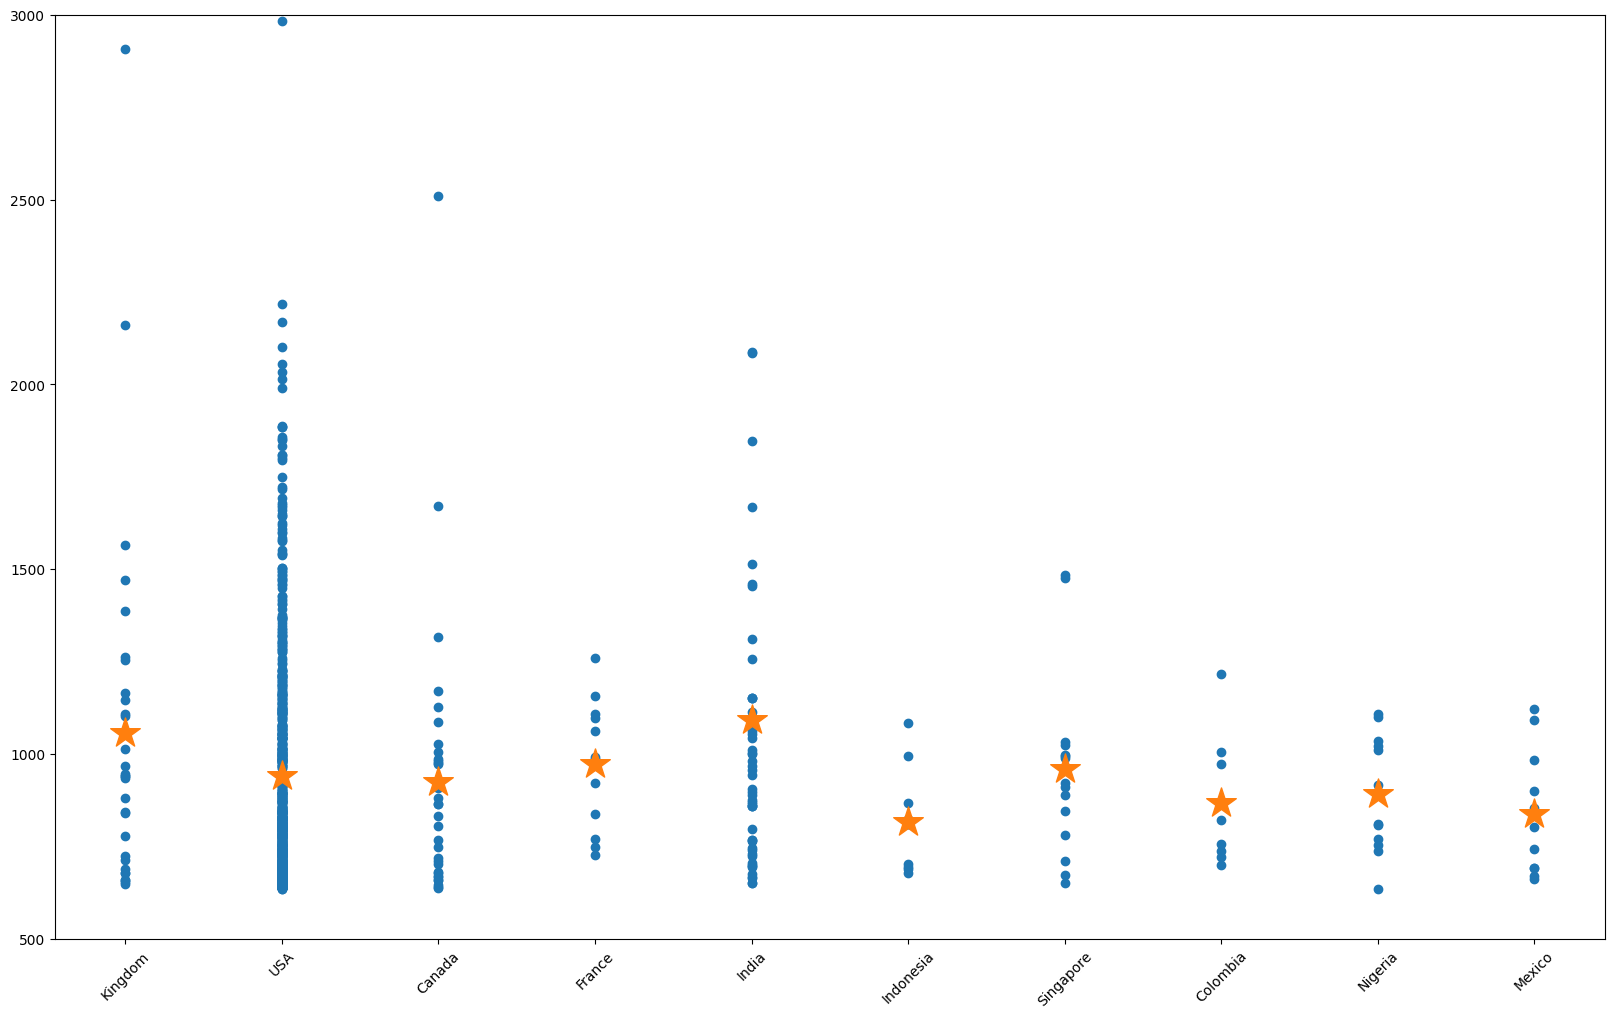

In [282]:
plt.figure(figsize=(20,12))
plt.scatter(long_df['country'], long_df['len_descr'])
plt.scatter(plot_mean_countries.index, plot_mean_countries['len_descr'], s=500, marker=('*'))
plt.tick_params(axis='x', rotation=45)
plt.ylim(500, 3000)

## Industries

### Long

In [46]:
long_descr = long_descr[long_descr['len_descr'] < 3000]
long_info = data.loc[long_descr.index.values][['industries']]
long_df = pd.concat([long_info, long_descr],axis=1)
long_df = long_df.drop(['cluster', 'how_different_from_500'], axis=1)

In [47]:
def convert_list_str_to_list(text):
    temp = text.strip('][').split(',')
    temp2 = []
    for i in temp:
        industry = i.strip()
        if industry.startswith("\"") or industry.startswith("\'"):
            industry = industry[1:]
        if industry.endswith("\"") or industry.endswith("\'"):
            industry = industry[:-1]
        temp2.append(industry)
    return temp2

In [48]:
long_df['industries'] = long_df['industries'].apply(convert_list_str_to_list)
long_df = long_df.explode('industries')

In [135]:
long_df.head(5)

,industries,year,descr,len_descr
380,B2B,2005,What is Infogami?\n\nThe art of transforming d...,659
380,Analytics,2005,What is Infogami?\n\nThe art of transforming d...,659
375,B2B,2005,ClickFacts is a Malware Software Solutions com...,787
375,Security,2005,ClickFacts is a Malware Software Solutions com...,787
374,Fintech,2005,"Founded in 2005, TextPayMe is an SMS payment s...",1110


In [51]:
industries_counter = long_df.groupby('industries').count()
not_common_industries = industries_counter[industries_counter['len_descr'] <= 5].index

In [166]:
industries_counter.sort_values(by='year', ascending=False)[['year']].head(7)

,year
industries,
B2B,391
Consumer,164
Healthcare,151
Fintech,119
Engineering,70
Product and Design,70
Industrials,55


In [53]:
medianed_industries = long_df.groupby('industries').median(numeric_only=True)
medianed_industries = medianed_industries.drop(not_common_industries, axis=0)
medianed_industries = medianed_industries.drop('Unspecified', axis=0)
medianed_industries = medianed_industries.sort_values('len_descr', ascending=False)

In [59]:
medianed_industries.head(5)

,len_descr
industries,
Travel,1164.5
Leisure and Tourism,1164.5
Consumer Finance,1110.0
Drug Discovery and Delivery,1059.0
Office Management,1033.0


In [103]:
def append_mean(text):
    industry_value = medianed_industries.loc[text]['len_descr']
    return industry_value

temp['mean'] = temp['industries'].apply(append_mean)
temp = long_df[long_df['industries'].isin(medianed_industries.index.values)]
temp = temp.sort_values(by='mean')

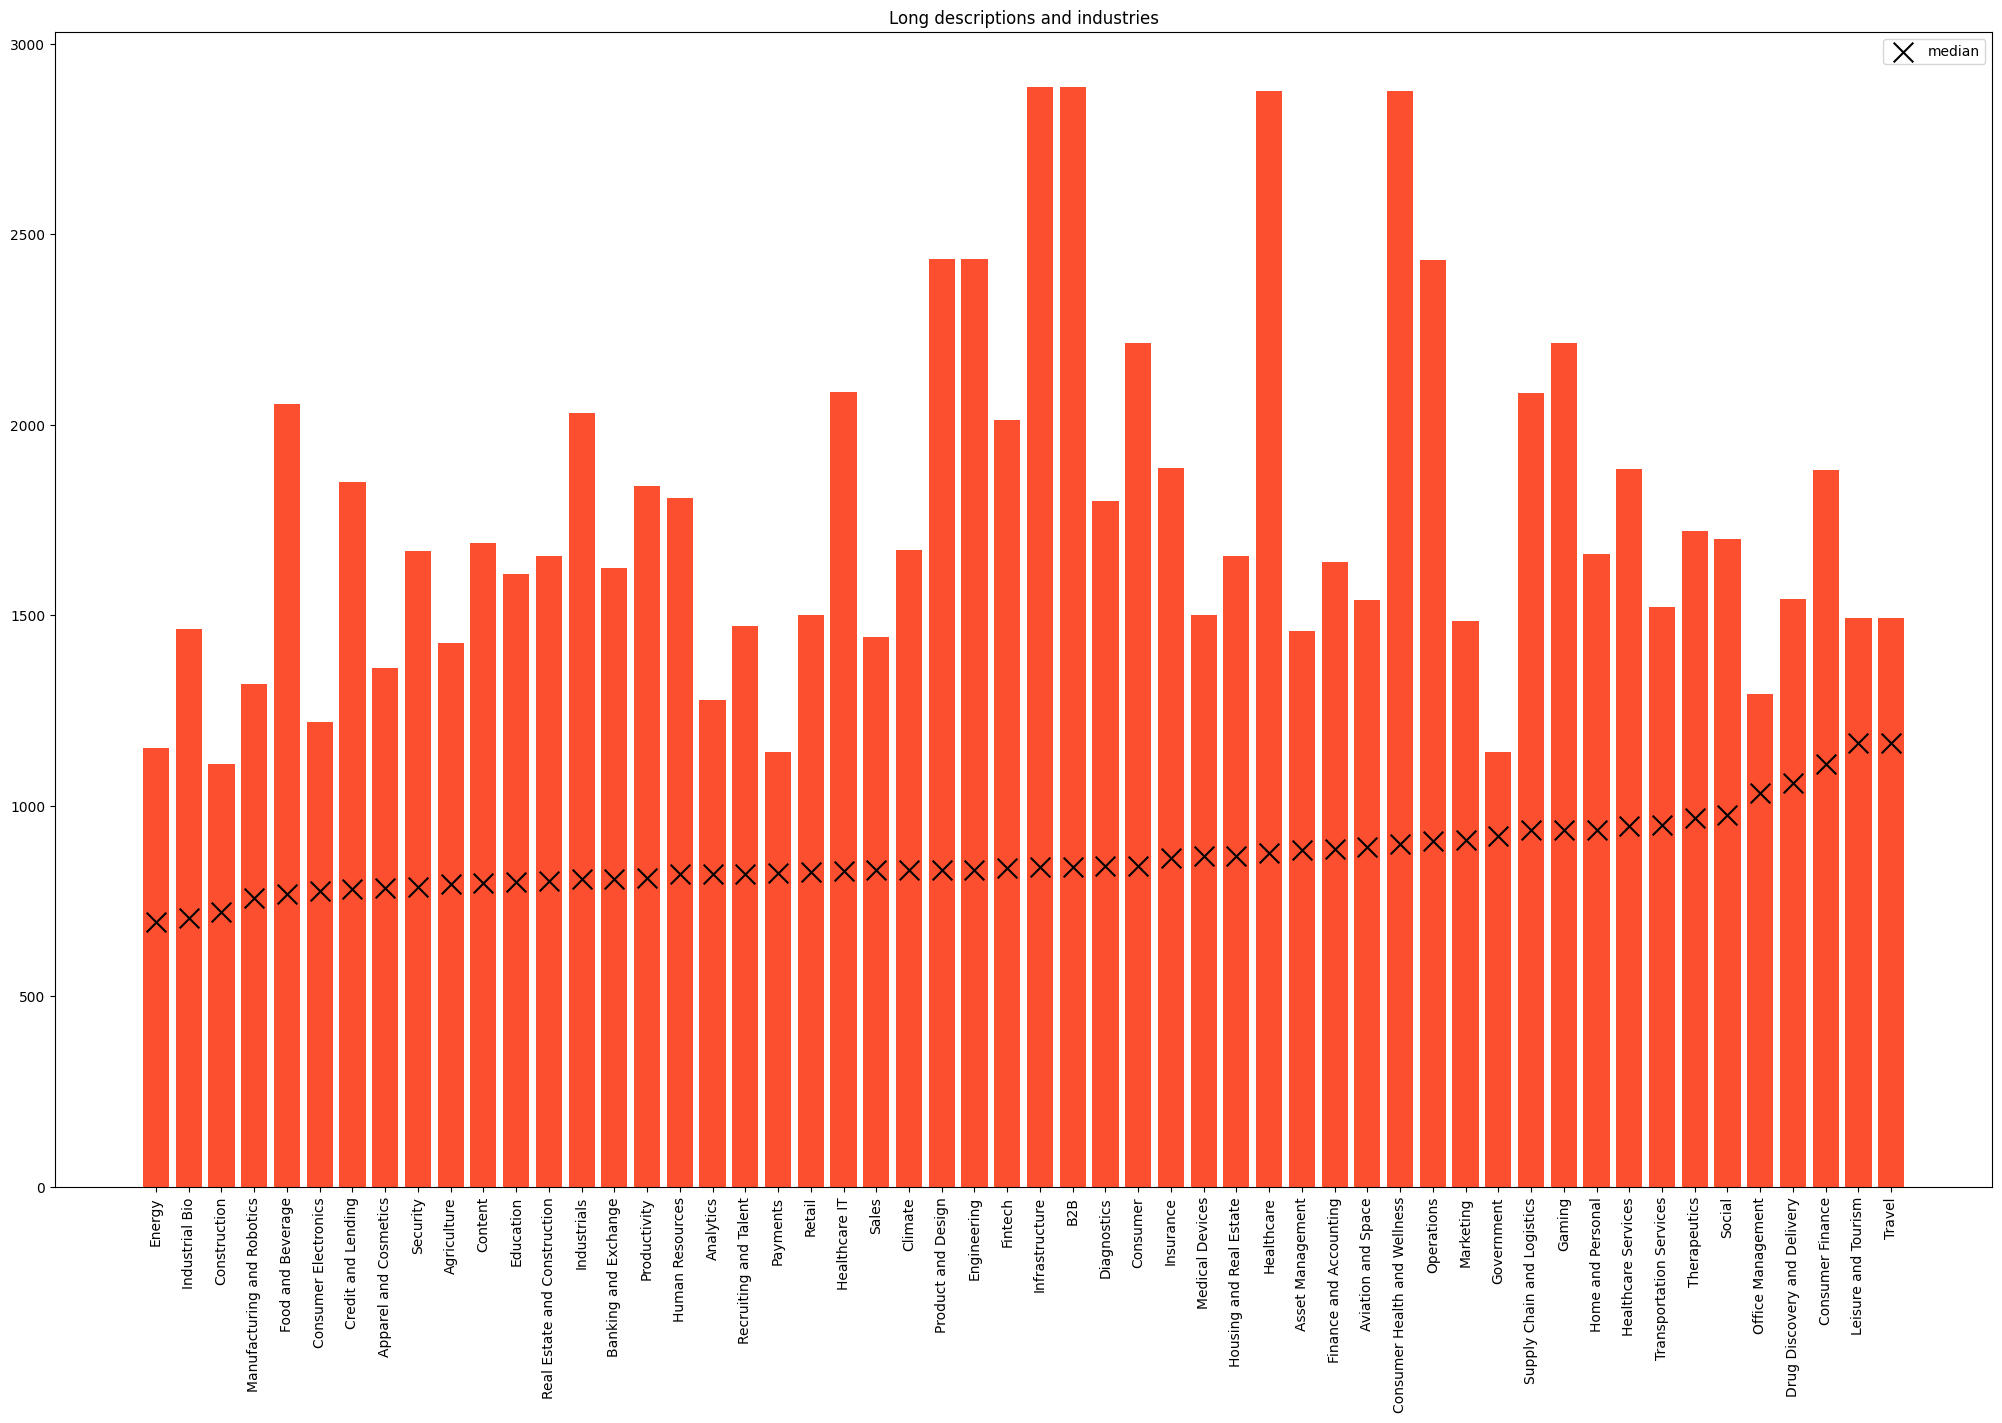

In [160]:
plt.figure(figsize=(25,15))
plt.bar(temp['industries'],temp['len_descr'], color='#fc4f30')
plt.scatter(medianed_industries.index, medianed_industries['len_descr'], s=200, marker=('x'), color='black', label='median')
plt.title("Long descriptions and industries")
plt.legend()
plt.xticks(rotation=90);

### Short

In [134]:
short_info = data.loc[short_descr.index.values][['industries']]
short_df = pd.concat([short_info, short_descr],axis=1)
short_df = short_df.drop(['cluster', 'how_different_from_500'], axis=1)

In [136]:
short_df['industries'] = short_df['industries'].apply(convert_list_str_to_list)
short_df = short_df.explode('industries')
short_df.head(5)

,industries,year,descr,len_descr
379,Consumer,2005,Founded by Steve Huffman and Alexis Ohanian in...,457
379,Content,2005,Founded by Steve Huffman and Alexis Ohanian in...,457
378,B2B,2005,Kiko is a web calendar for anyone who wants to...,493
378,Productivity,2005,Kiko is a web calendar for anyone who wants to...,493
373,Consumer,2005,"Loopt, based in Silicon-Valley and backed by l...",474


In [138]:
industries_counter_sh = short_df.groupby('industries').count()
not_common_industries_sh = industries_counter_sh[industries_counter['len_descr'] <= 5].index

In [171]:
industries_counter_sh.sort_values(by='year', ascending=False)[['year']].head(7)

,year
industries,
B2B,1463
Consumer,508
Fintech,374
Healthcare,320
Engineering,302
Product and Design,302
Industrials,153


In [139]:
medianed_industries_sh = short_df.groupby('industries').median(numeric_only=True)
medianed_industries_sh = medianed_industries_sh.drop(not_common_industries_sh, axis=0)
medianed_industries_sh = medianed_industries_sh.drop('Unspecified', axis=0)
medianed_industries_sh = medianed_industries_sh.sort_values('len_descr', ascending=False)

In [152]:
def append_mean1(text):
    industry_value = medianed_industries_sh.loc[text]['len_descr']
    return industry_value

temp_sh = short_df[short_df['industries'].isin(medianed_industries_sh.index.values)]
temp_sh['mean'] = temp_sh['industries'].apply(append_mean1)
temp_sh = temp_sh.sort_values(by='mean');

/var/folders/bz/1tlnq74x49v0f7m4cm3dzs6r0000gp/T/ipykernel_3188/1201720785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_sh['mean'] = temp_sh['industries'].apply(append_mean1)


In [153]:
temp_sh

,industries,year,descr,len_descr,mean
75,Content,2011,Genius is the world's biggest encyclopedia of ...,629,225.0
293,Content,2008,The Youlicit web content recommendation engine...,532,225.0
1772,Content,2018,Tingles is a video platform for relaxation. It...,216,225.0
22249,Content,2020,Artifact makes it easy to record stories with ...,352,225.0
195,Content,2010,Upbeat is a software-powered next-generation P...,577,225.0
...,...,...,...,...,...
667,Office Management,2014,Doblet is the world’s first network of batteri...,496,447.5
630,Office Management,2014,"As the pace of innovation continues, it is gro...",567,447.5
621,Office Management,2014,MerryMint helps you discover and book virtual ...,169,447.5
1514,Office Management,2017,WaystoCap takes the pain out of working intern...,578,447.5


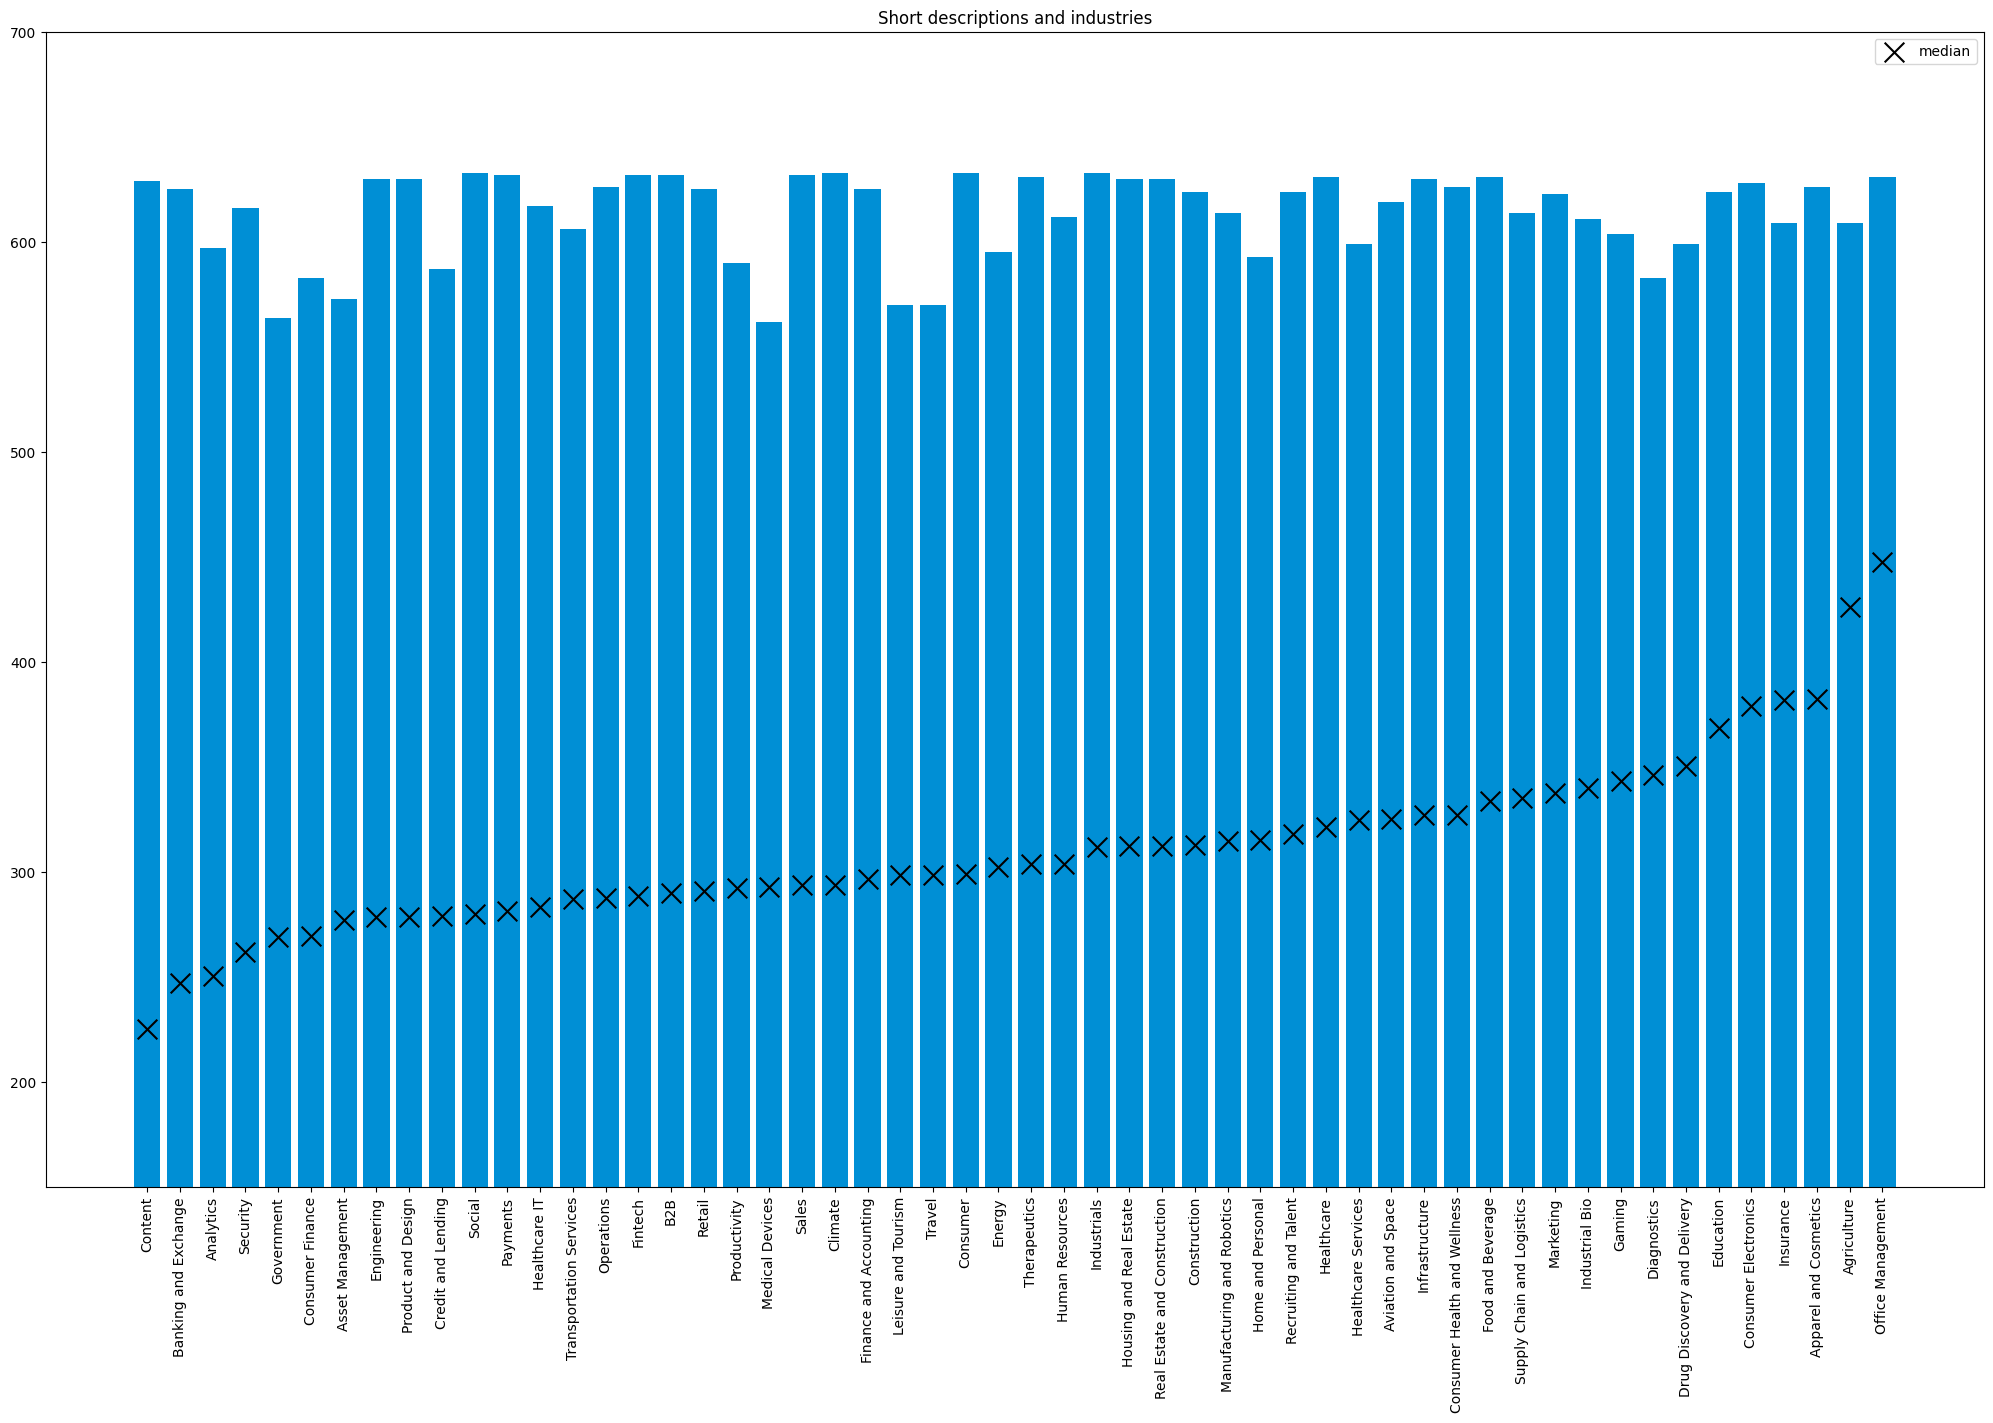

In [159]:
plt.figure(figsize=(25,15))
plt.bar(temp_sh['industries'],temp_sh['len_descr'], color='#008fd5')
plt.scatter(medianed_industries_sh.index, medianed_industries_sh['len_descr'], s=200, marker=('x'), c='black', label='median')
plt.ylim(150, 700)
plt.xticks(rotation=90)
plt.title("Short descriptions and industries")
plt.legend();